<a href="https://colab.research.google.com/github/alexandrebabilone/data_science/blob/main/Analisando_os_Dados_do_Airbnb_Santiago%2C_Chile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Santiago, Chile*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Santiago, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import seaborn as sns
import pandas as pd
pd.options.display.float_format = "{:.2f}".format

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/chile/rm/santiago/2022-12-29/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm`- ?
* `license` - ?

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43,-70.60,Private room,45796,3,0,NaN,NaN,1,178,0,NaN
1,559852,Deluxe 2 Bedrooms Apartment,2752180,Marcos,NaN,Providencia,-33.43,-70.62,Entire home/apt,95049,2,12,2019-07-14,0.13,7,362,0,NaN
2,52811,Suite Providencia 1 Santiago Chile,244792,Cristián,NaN,Providencia,-33.43,-70.62,Entire home/apt,46660,1,46,2021-11-04,0.31,3,89,0,NaN
3,1854958,2do piso casa en Las Condes,9682413,Felipe,NaN,Las Condes,-33.40,-70.55,Private room,43204,1,0,NaN,NaN,1,365,0,NaN
4,53494,depto centro ski el colorado chile,249097,Paulina,NaN,Lo Barnechea,-33.34,-70.29,Entire home/apt,149999,2,38,2021-05-22,0.48,1,182,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
print(f'O dataset possui {df.shape[0]} entradas e {df.shape[1]} variáveis.\n')
# verificar as 5 primeiras entradas do dataset
print(df.dtypes)

O dataset possui 9128 entradas e 18 variáveis.

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isna().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group              1.00
license                          0.97
reviews_per_month                0.25
last_review                      0.25
name                             0.00
minimum_nights                   0.00
number_of_reviews_ltm            0.00
availability_365                 0.00
calculated_host_listings_count   0.00
number_of_reviews                0.00
id                               0.00
room_type                        0.00
longitude                        0.00
latitude                         0.00
neighbourhood                    0.00
host_name                        0.00
host_id                          0.00
price                            0.00
dtype: float64

As variáveis `reviews_per_month` e `last_review` possuem 24,8% de dados ausentes. Entretanto, ainda não faremos nenhum tratamento específico para esses dados ausentes.

Considerando que as variáveis `neighbourhood_group` e `license` possuem alta taxa de valores ausentes, elas serão excluídas da análise.

In [6]:
df.drop(columns=['neighbourhood_group', 'license'], inplace=True)

### **Q3. Qual o tipo de distribuição das variáveis?** 

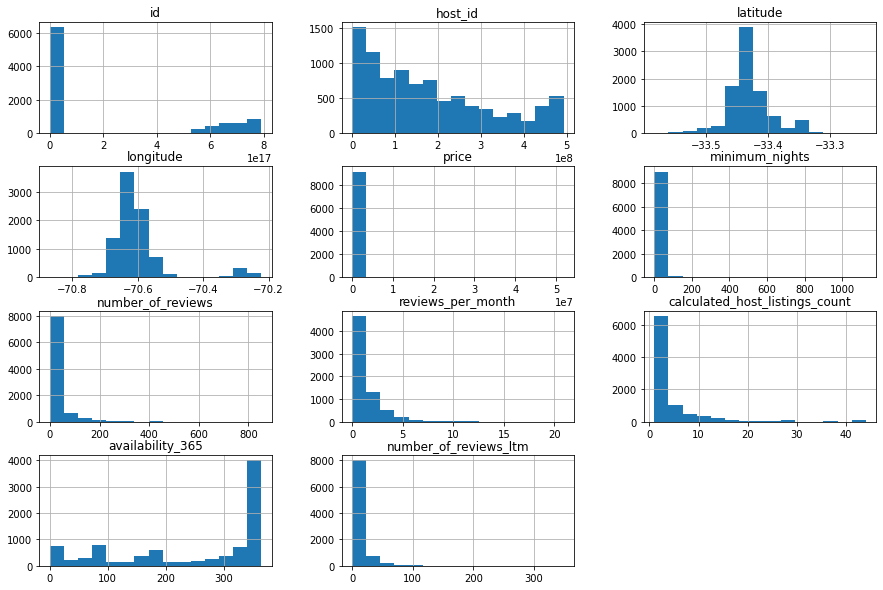

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [8]:
# ver a média da coluna `price``
print(f'Média de preços: {df.price.mean():.2f} CLP')

Média de preços: 101605.41 CLP


### **Q5. Há outliers presentes?**

In [9]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,9128.00,9128.00,9128.00,6864.00,9128.00,9128.00,9128.00
mean,101605.41,7.28,24.12,1.29,4.10,249.53,8.65
std,991405.56,31.52,49.08,1.57,6.60,129.51,16.07
min,6830.00,1.00,0.00,0.01,1.00,0.00,0.00
25%,29714.00,1.00,1.00,0.25,1.00,140.75,0.00
50%,42857.00,2.00,5.00,0.75,1.00,326.00,2.00
75%,66714.00,3.00,24.00,1.79,4.00,362.00,10.00
max,51844886.00,1124.00,852.00,20.90,44.00,365.00,349.00


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 66714.00, porém seu valor máximo é 51844886.00.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

Assim, iremos analisar mais a fundo essas duas variáveis.
#### Boxplot para `price`


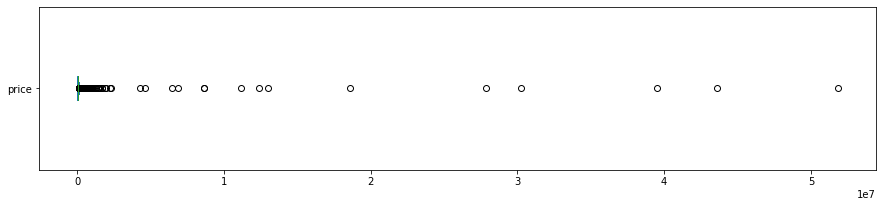

In [10]:
df.price.plot(kind='box', vert=False, figsize=(15, 3));

Iremos fazer um ponto de corte na variável `price` no valor de 200000 CLP. As diárias acima desse valor representam apenas 5,87% das entradas. Elas estão muito acima das demais e podem acabar distorcendo os resultados das análises.

In [11]:
cutoff = 200000
print(f'\nPrice: valores acima de {cutoff}')
print(f'{len(df[df.price > cutoff])} entradas, ou seja, {(len(df[df.price > cutoff])/df.shape[0])*100:.2f}% do total de entradas')


Price: valores acima de 200000
536 entradas, ou seja, 5.87% do total de entradas


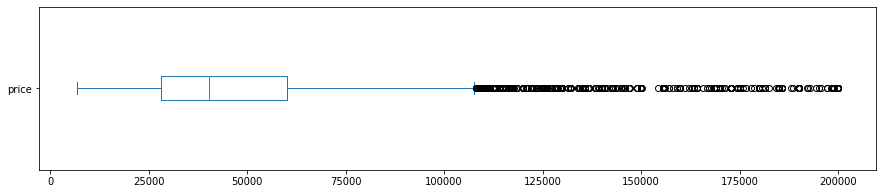

In [12]:
# criar um novo dataframe sem os outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > cutoff].index, inplace=True)
#Box plot sem os outliers
df_clean.price.plot(kind='box', vert=False, figsize=(15, 3));

#### Boxplot para `minimum_nights`

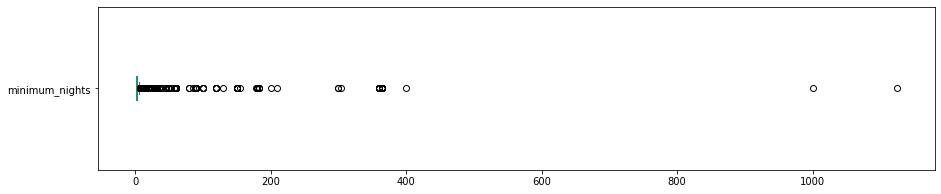

In [13]:
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3));

Iremos fazer um ponto de corte na variável `minimum_nights` no valor de 30, pois não seria nada razoável a reserva mínima ser de pelo menos 30 noites.

In [14]:
cutoff = 30
print(f'minimum_nights: valores acima de {cutoff}')
print(f'{len(df[df.minimum_nights > cutoff])} entradas, ou seja, {(len(df[df.minimum_nights > cutoff])/df.shape[0])*100:.2f}% do total de entradas')

minimum_nights: valores acima de 30
220 entradas, ou seja, 2.41% do total de entradas


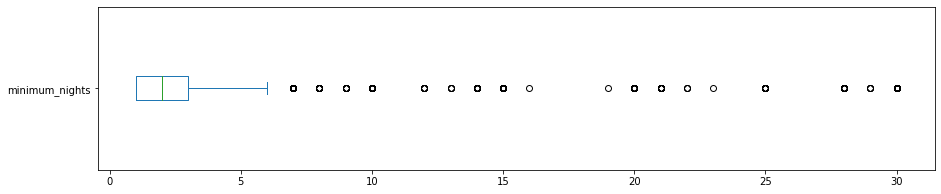

In [15]:
df_clean.drop(df_clean[df_clean.minimum_nights > cutoff].index, inplace=True)
#Box plot sem os outliers
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3));

### **Q6. Qual a correlação existente entre as variáveis**

In [16]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.00,-0.02,-0.06,-0.07,0.10,0.06,-0.05
minimum_nights,-0.02,1.00,-0.06,-0.20,-0.11,-0.07,-0.15
number_of_reviews,-0.06,-0.06,1.00,0.53,0.04,-0.05,0.74
reviews_per_month,-0.07,-0.20,0.53,1.00,0.06,0.12,0.76
calculated_host_listings_count,0.10,-0.11,0.04,0.06,1.00,0.05,0.09
availability_365,0.06,-0.07,-0.05,0.12,0.05,1.00,0.04
number_of_reviews_ltm,-0.05,-0.15,0.74,0.76,0.09,0.04,1.00


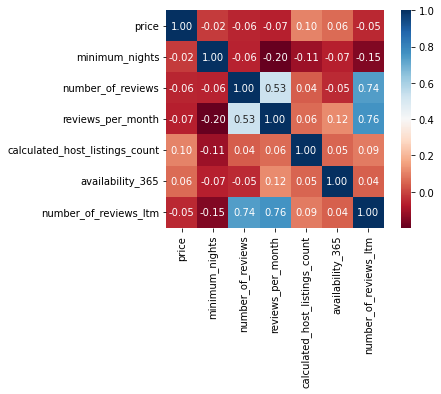

In [17]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

In [18]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    5463
Private room       2757
Shared room         118
Hotel room           52
Name: room_type, dtype: int64

In [19]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts()/df_clean.shape[0])

Entire home/apt   0.65
Private room      0.33
Shared room       0.01
Hotel room        0.01
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**

A seguir, uma tabela mostrando os bairros com o maior preço médio das diárias, seguido da quantidade de imóveis naquele bairro.

In [39]:
# plotar os imóveis pela latitude-longitude
df_clean.groupby(['neighbourhood']).agg({'price': 'mean', 'id': 'count'}).rename(columns={'price': 'Preço médio', 'id': 'Imóveis disponíveis no bairro'}).sort_values(ascending=False, by='Preço médio')

,Preço médio,Imóveis disponíveis no bairro
neighbourhood,,
Lo Barnechea,122446.55,256
Lo Espejo,91890.00,1
Vitacura,78147.54,283
La Granja,66983.29,7
Las Condes,64038.97,1468
Pudahuel,58254.95,57
Providencia,50682.96,1712
Huechuraba,48077.84,37
Quilicura,47814.00,26


In [ ]:
# plotar os imóveis pela latitude-longitude

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [26]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

3.7497020262216925

## Conclusões


Não foi possível encontrar grande correlação entre as variáveis, a não ser entre aquelas em que já existe uma correlação óbvia, como `number_of_reviews` e `reviews_per_month`.